In [3]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\SQL datasets\retail_sales_dataset.csv")

In [7]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [9]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [13]:
df.isnull().sum()
#No null Values 

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

**How does customer age and gender influence their purchasing behavior?**

In [17]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [21]:
gender_expenditure = df.groupby('Gender')['Total Amount'].mean().reset_index()
gender_expenditure

,Gender,Total Amount
0,Female,456.549020
1,Male,455.428571


In [41]:
bins = [15,25,35,45,55,65]
labels = ['15-24','25-34','35-44','45-54','55-65']

In [43]:
df['Age group'] = pd.cut(df['Age'], bins = bins, labels = labels)

In [45]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,25-34


In [50]:
Age_group_expenditure = df.groupby('Age group')['Total Amount'].mean().sort_values(ascending=False).reset_index()
Age_group_expenditure

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34496\318091792.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Age_group_expenditure = df.groupby('Age group')['Total Amount'].mean().sort_values(ascending=False).reset_index()


,Age group,Total Amount
0,15-24,500.295858
1,25-34,480.390244
2,35-44,454.801980
3,45-54,439.694323
4,55-65,412.358974


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34496\291191625.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values = 'Total Amount', index = 'Age group', columns = 'Gender', aggfunc= 'mean')


<Axes: xlabel='Age group'>

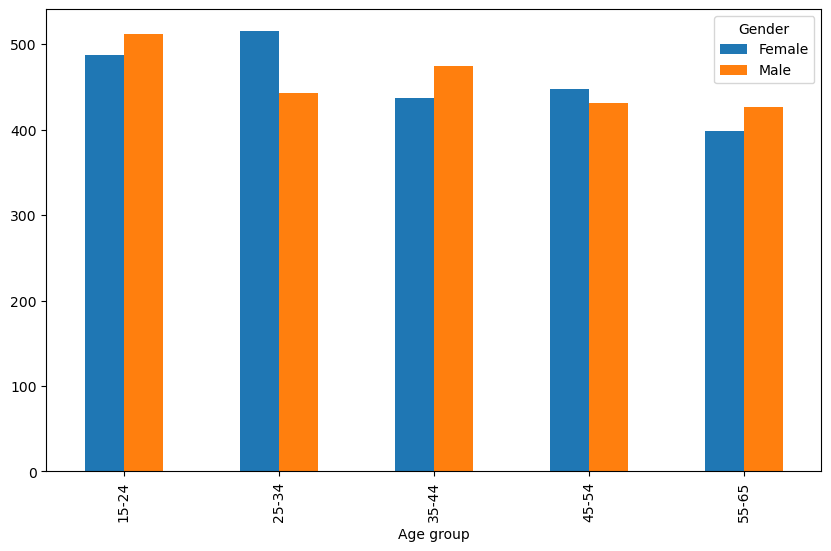

In [56]:
pivot = df.pivot_table(values = 'Total Amount', index = 'Age group', columns = 'Gender', aggfunc= 'mean')
pivot.plot(kind='bar', figsize=(10,6))

In [66]:
pivot = df.pivot_table(values = 'Total Amount', index = 'Age group', columns = 'Product Category', aggfunc = 'sum')
pivot

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34496\3241275317.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values = 'Total Amount', index = 'Age group', columns = 'Product Category', aggfunc = 'sum')


Product Category,Beauty,Clothing,Electronics
Age group,,,
15-24,31280,26510,26760
25-34,31240,39975,27265
35-44,28405,29550,33915
45-54,34720,30485,35485
55-65,17870,29060,33480


**Key Findings**
Gender Spending Insights

- Women spend slightly more overall (456.549020) compared to men (455.428571) on average per transaction.

- While the difference is small, it suggests women may contribute marginally more to total revenue.

**Age Group Profitability**

- The 15–24 age group is the most profitable, with the highest total spending among all age groups.

- This indicates younger customers could be the primary target demographic for marketing campaigns.

**What This Means (Business Impact)**
**For Retailers:**

- Focus marketing efforts on younger customers (15–24), as they represent the most profitable segment.

- Create campaigns/products that resonate with female customers, as they slightly outspend their male counterparts.

**Are there discernible patterns in sales across different time periods?**

In [77]:
df['Date'] = pd.to_datetime(df['Date'])

In [104]:
monthly_expenditure = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum().reset_index(name = 'Expenditure($)')

In [106]:
monthly_expenditure

,Date,Expenditure($)
0,2023-01,35450
1,2023-02,44060
2,2023-03,28990
3,2023-04,33870
4,2023-05,53150
5,2023-06,36715
6,2023-07,35465
7,2023-08,36960
8,2023-09,23620
9,2023-10,46580


In [85]:
df['Day of Week'] = df['Date'].dt.day_name()

In [118]:
daily_sales = df.groupby('Day of Week')['Total Amount'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index(name = 'Expenditure')
daily_sales

,Day of Week,Expenditure
0,Monday,481.164384
1,Tuesday,431.304348
2,Wednesday,422.805755
3,Thursday,437.682927
4,Friday,463.566434
5,Saturday,525.433333
6,Sunday,424.637681


**Seasonal Trends Observed:**

(*currency($)*)

- May 2023 (53,150) is the peak month, showing a clear sales spike.

- October 2023 (46,580) December (44,690) are also high-performing months, possibly due to seasonal campaigns or holidays.

- September 2023 (23,620) and March (28,990) are lower, suggesting off-season dips.

- January 2024 (1,530) shows a dramatic drop, likely because it’s incomplete or reflects a new year sales slump.

**Business Interpretation**
*Retailers could:*

- Focus marketing and stock during May, October, and December to maximize revenue.

- Investigate why September underperforms (*possible post-holiday lull*) and design promotions to boost sales during slow months.



**Peak Day:**

- Saturday has the highest average sales (525.43) → customers likely shop more on weekends.

- *Other Strong Days:*

- Monday (481.16) and Friday (463.57) also perform well.

*Suggestion* : Suggest possible start-of-week and pre-weekend shopping sprees.

**Weaker Days:**

- Wednesday (422.80) and Sunday (424.63) are slightly lower.

 *Maybe customers avoid midweek or Sunday shopping?*

**Business Interpretation.**

*What this means for retailers:*

- Focus promotions and discounts on slower days (Wed, Sun) to drive more traffic.

- Prepare for higher stock and staff on Saturdays to handle increased demand.



**Which product categories hold the highest appeal among customers?**

In [136]:
df['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [150]:
pivot = df.pivot_table(values = 'Transaction ID', index = 'Gender', columns ='Product Category', aggfunc = 'count')
pivot

Product Category,Beauty,Clothing,Electronics
Gender,,,
Female,166,174,170
Male,141,177,172


In [152]:
df.groupby('Gender')['Product Category'].count()

Gender
Female    510
Male      490
Name: Product Category, dtype: int64

**Most Popular Categories (Overall):**

-Clothing (351 transactions)

-Electronics (342 transactions)

-Beauty (307 transactions)

*Clothing edges slightly ahead as the top-selling category overall.*


**Total Transactions by Gender:**

-Female: 510 transactions (51%)

-Male: 490 transactions (49%)

*Sales are almost balanced, but females lead slightly.*


**Insights from table:**

-Females dominate Beauty (166 vs 141).

-Clothing is evenly popular among both genders.(174 vs 177)

-Electronics also has near parity, slightly higher among males (172 vs 170).

**Business Interpretation**

*Retailers could:*

-Target beauty product marketing more toward female customers, as they dominate this category.

-For Clothing and Electronics, use gender-neutral campaigns, since both genders show high engagement.

-Create cross-category bundles (e.g., pair beauty and clothing items for female customers).

**What are the relationships between age, spending, and product preferences?**

In [160]:
pivot = df.pivot_table(values = 'Transaction ID', index = 'Age group', columns = 'Product Category', aggfunc = 'count')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34496\1709745317.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values = 'Transaction ID', index = 'Age group', columns = 'Product Category', aggfunc = 'count')


In [162]:
pivot

Product Category,Beauty,Clothing,Electronics
Age group,,,
15-24,60,51,58
25-34,67,74,64
35-44,54,76,72
45-54,71,76,82
55-65,55,74,66


In [170]:
df.groupby('Age group')['Transaction ID'].count().reset_index(name = 'Transaction Count')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34496\184709568.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age group')['Transaction ID'].count().reset_index(name = 'Transaction Count')


,Age group,Transaction Count
0,15-24,169
1,25-34,205
2,35-44,202
3,45-54,229
4,55-65,195


In [176]:
df['Age'].corr(df['Total Amount'])

-0.060568023883045684

**Observations:**

- Younger customers (15–24) prefer Beauty products.

- Middle-aged customers (25–44) shift towards Clothing.

- Older customers (45–54) spend more on Electronics.

- 45–54 age group has the highest transaction count (229).

- 15–24 has the lowest transaction count (169), even though they prefer Beauty.

- df['Age'].corr(df['Total Amount']) = -0.0605: *This is a very weak negative correlation. Age doesn’t strongly predict how much people spend per transaction.*

**Business Insights**

*Retailers could:*

- Target beauty product ads to younger demographics (15–24).

- Offer loyalty programs for clothing to middle-aged buyers.

- Focus electronics campaigns on older age groups (45–54).

**How do customers adapt their shopping habits during seasonal trends?**


In [182]:
df['Month'] = df['Date'].dt.month

In [186]:
Monthly_sales = df.groupby('Month')['Total Amount'].sum()

In [188]:
Monthly_sales

Month
1     36980
2     44060
3     28990
4     33870
5     53150
6     36715
7     35465
8     36960
9     23620
10    46580
11    34920
12    44690
Name: Total Amount, dtype: int64

In [190]:
seasonal_trends = df.groupby([df['Date'].dt.month, 'Product Category'])['Total Amount'].sum().unstack()

In [192]:
seasonal_trends

Product Category,Beauty,Clothing,Electronics
Date,,,
1,13930,13125,9925
2,14035,14560,15465
3,10545,15065,3380
4,11905,13940,8025
5,12450,17455,23245
6,10995,10170,15550
7,16090,8250,11125
8,9790,12455,14715
9,6320,9975,7325


In [194]:
avg_spend_per_month = df.groupby('Month')['Total Amount'].mean()

In [196]:
avg_spend_per_month

Month
1     474.102564
2     518.352941
3     397.123288
4     393.837209
5     506.190476
6     476.818182
7     492.569444
8     393.191489
9     363.384615
10    485.208333
11    447.692308
12    491.098901
Name: Total Amount, dtype: float64

**Insight from Data**

**Observation:**

- May is the peak sales month, possibly due to pre-summer shopping.

- October and December show strong sales, likely holiday season shopping spikes.

- September is the weakest month, hinting at an off-season slump.
  

- Electronics spikes in May and December (possible holiday and big purchase months).

- Beauty products dominate in January and July (maybe gift-giving or mid-year self-care trends).

- Clothing peaks in May and November (likely seasonal wardrobe changes).


- Customers spend more per transaction in February, May, and December.

- September not only has low total sales but also lowest average spend—a double dip.

**Business Insights (Interpretation)**

*Retailers could:*

- Boost stock & marketing in May, October, and December to ride spending peaks.
  
- Offer promotions in September to counteract the sales slump.
  
- Target Beauty promotions mid-year (July) and Electronics at year-end (December).

**Are there distinct purchasing behaviors based on the number of items bought per transaction?**

In [219]:
bins = [0, 2, 4, df['Quantity'].max() + 1]
labels = ['Small (1-2)', 'Medium (3-4)', 'Large (5+)']
df['Basket Size'] = pd.cut(df['Quantity'], bins=bins, labels=labels)

In [231]:
basket_spend = df.groupby('Basket Size')['Total Amount'].mean().reset_index(name = 'Total Amount')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34496\4036766104.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  basket_spend = df.groupby('Basket Size')['Total Amount'].mean().reset_index(name = 'Total Amount')


In [233]:
basket_spend

,Basket Size,Total Amount
0,Small (1-2),253.739919
1,Medium (3-4),655.049603
2,Large (5+),NaN


In [237]:
basket_product = df.groupby(['Basket Size', 'Product Category'])['Transaction ID'].count().unstack()
basket_product

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34496\2161605193.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  basket_product = df.groupby(['Basket Size', 'Product Category'])['Transaction ID'].count().unstack()


Product Category,Beauty,Clothing,Electronics
Basket Size,,,
Small (1-2),149,168,179
Medium (3-4),158,183,163
Large (5+),0,0,0


**Observation:**

- Medium baskets drive more revenue per transaction.

- Since there are no large baskets, customers don’t seem to do big shopping trips.

**Business Interpretation**

*Retailers could:*

- Encourage upselling/cross-selling to increase basket size from small to medium.
  
- Loyalty Programs
  
- Add cheaper, daily-use products that customers naturally buy in bulk

- Introduce Bundle Discounts

**What insights can be gleaned from the distribution of product prices within each category?**

In [241]:
price_summary = df.groupby('Product Category')['Price per Unit'].describe()

In [243]:
price_summary

,count,mean,std,min,25%,50%,75%,max
Product Category,,,,,,,,
Beauty,307.0,184.055375,194.929399,25.0,30.0,50.0,300.0,500.0
Clothing,351.0,174.287749,186.017065,25.0,30.0,50.0,300.0,500.0
Electronics,342.0,181.900585,189.049673,25.0,30.0,50.0,300.0,500.0


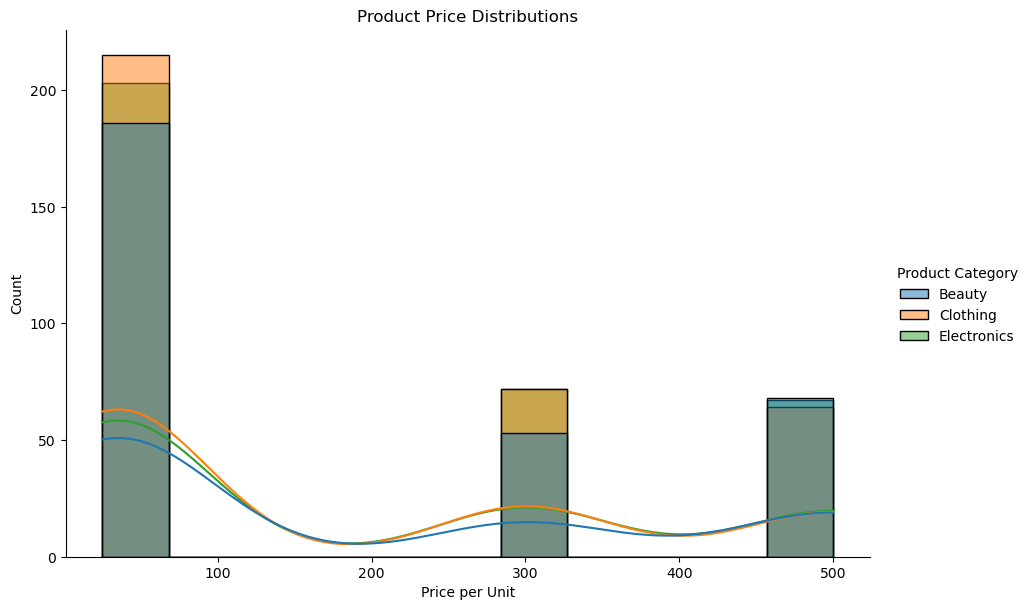

In [249]:
sns.displot(data=df, x='Price per Unit', hue='Product Category', kde=True, height=6, aspect=1.5)
plt.title('Product Price Distributions')
plt.show()

**Insights**

**1 Price Ranges Are Very Similar Across Categories**

- Min Price = $25 in all categories (budget items).

- Max Price = $500 in all categories (premium products).

**2 Most Items Are Low-to-Mid Price**

- 50% of all products (median) cost $50 or less.

- 75% of products cost $300 or less, suggesting the majority of inventory is affordable.

**3 High Standard Deviation (~$190)**

- Significant variation in product pricing—indicates categories mix low-budget and premium items.


**Business Takeaways**

*What can retailers do with this insight?:*

- Bundle low-priced items (25–$50) to increase basket size.

- Focus premium advertising campaigns on (300–$500) range products.

- Analyze sales volume per price band to see which contributes most to revenue.




**Analysis Done by Etesin Ediomo Usoro**

*ediomoetesin40@gmail.com*